##   Lab 2 : First Machine Learning Pro0ject

In [1]:
! pip install pandas matplotlib seaborn scikit-learn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#load the dataset
dataset = pd.read_csv('iris.data', header=None)

##   Task 3 : Set Column Names

In [16]:
#Assign column names
dataset.columns = ["Sepal.Length", "Sepal.Width","Petal.Length","Petal.Width", "Species"]
dataset.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##   Task 4: Understanding the Dataset

In [17]:
# check dimensions
print(f"Dataset dimensions: {dataset.shape}")

Dataset dimensions: (150, 5)


In [18]:
dataset.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [19]:
#summary of dataset
dataset.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


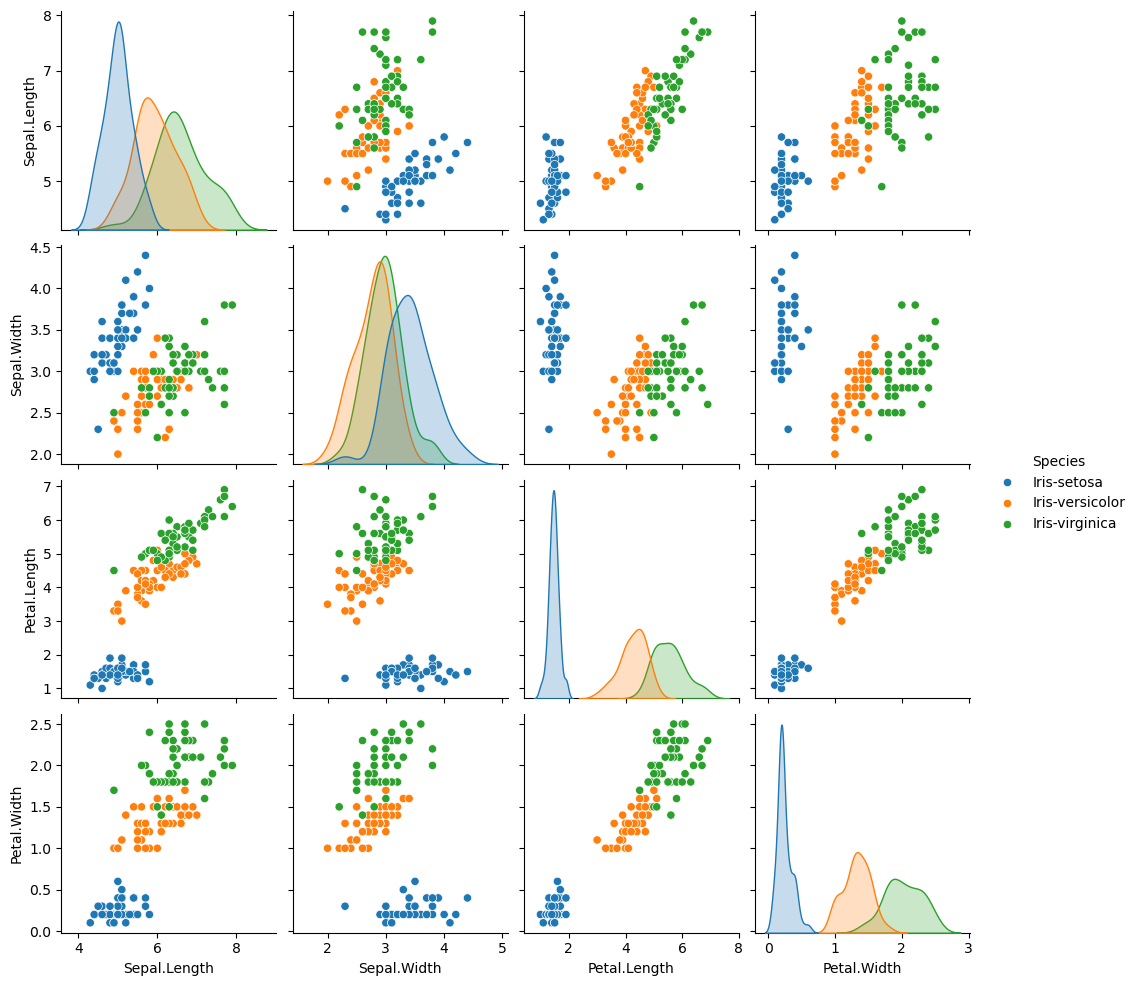

In [20]:
# visualize pairwise relationships
sns.pairplot(dataset, hue='Species')
plt.show()

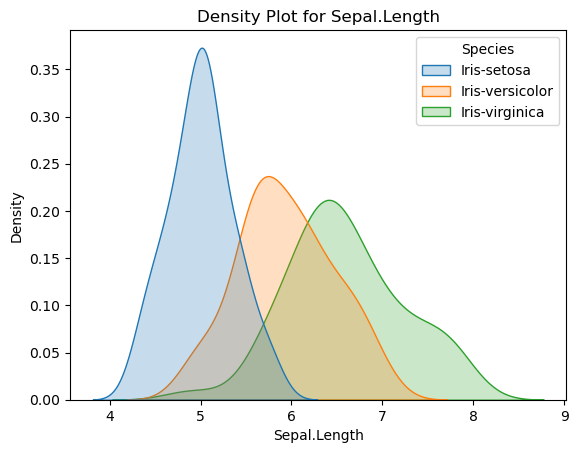

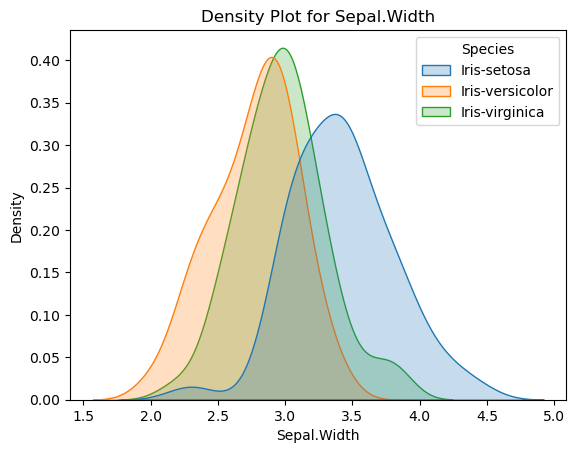

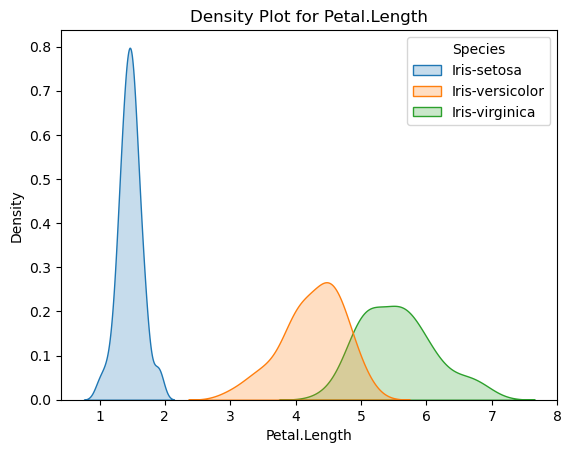

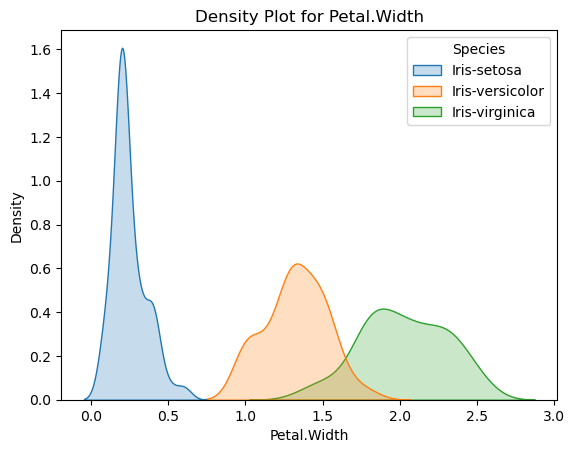

In [21]:
# Density plots for each feature
for column in dataset.columns[:-1]:
    sns.kdeplot(data=dataset, x=column, hue='Species', fill=True)
    plt.title(f'Density Plot for {column}')
    plt.show()

##   Task 5: Split Dataset into Train and Test Sets

In [22]:
from sklearn.model_selection import train_test_split

#Split dataset into training (80%) and testing (20%) sets
x= dataset.iloc[:,:-1] #features
y = dataset.iloc[:,-1] #labels

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123)

##   Task 6: Train Machine Learning Algorithms

In [23]:
# import libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [24]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [25]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

##   Task 7 : Model Evaluation

In [27]:
# cross validation on LDA
lda_scores = cross_val_score(lda, x_train, y_train, cv =5)
print(f"LDA Accuracy: {lda_scores.mean()}")

# cross validation on Decision Tree
dt_scores = cross_val_score(dt, x_train, y_train, cv =5)
print(f"Decision Tree Accuracy: {dt_scores.mean()}")

# cross validation on KNN
knn_scores = cross_val_score(knn, x_train, y_train, cv =5)
print(f"KNN Accuracy: {knn_scores.mean()}")

LDA Accuracy: 0.9833333333333334
Decision Tree Accuracy: 0.9333333333333333
KNN Accuracy: 0.9666666666666668


##   Task 8: Make Predictions

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

#make predictions using the best model
y_pred = lda.predict(x_test)

# evaluate predictions
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.86      1.00      0.92         6
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

